In [3]:
import pandas as pd
import requests
import json
from bs4 import BeautifulSoup
from tqdm import tqdm
import csv
import numpy as np
import pickle as pk
from collections import Counter
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [16]:
pmidlist = []
with open ("pmid-nationalhe-set.txt",'r',encoding = 'utf-8') as f:
    for line in f:
        pmidlist.append(line.strip('\n'))

In [17]:
pubmed_ids = pmidlist
unnormallist = []
pubtator = []
keywordlist = []

for id in tqdm(pubmed_ids): 
    html_for_id = requests.get('https://www.ncbi.nlm.nih.gov/research/pubtator-api/publications/export/pubtator?pmids={0}'.format(id))
    # html_for_id = requests.get('https://www.ncbi.nlm.nih.gov/research/pubtator-api/publications/export/pubtator?pmids=31841525')
    soup =  BeautifulSoup(html_for_id.text,'html.parser')
    
    try:
        li = soup.prettify().split('\n')
        li.pop()
        keyword = []
        for i in li[2:]:
            j = i.split('\t')
            # print(j)
            try:
                if j[3].istitle() == True:
                    keyword.append(j[3])
                else:
                    a = j[3].lower()
                    keyword.append(a)
            except IndexError:
                continue
        print(keyword)
        keywordlist.append(keyword)
    except AttributeError:
        keywordlist.append("None")
    # break


  1%|          | 46/3863 [00:41<58:37,  1.09it/s]['gatekeepers', 'Women', 'patients', 'onion', 'patients', 'hypertension', 'patients', 'diabetes mellitus', 'patients', 'hyperlipidemia', 'patients', 'chronic disease']


In [ ]:
df = pd.read_csv('keyword.csv')
df.iloc[0].isupper()

In [ ]:
Ab = []
for a in abstracts:
    a = a.strip()
    a = a.replace("\'" , "'" )
    print(a)
    Ab.append(a)
with open('Ab.txt', 'w', encoding = 'utf-8') as f:
    f.write(str(Ab))

In [ ]:
df = pd.DataFrame (Ab,columns=['abstract'],index = pmidlist)
df.to_csv('Ab.csv')

keyword -->txt

In [ ]:
def lower(x):
    if x.isupper() != True:
        x = x.lower()
    return x
def lowerlist(a):
    temp=[lower(x) for x in a]
    return temp

In [ ]:
with open('keyword.txt','r',encoding = 'utf-8') as f:
    read = f.read()
read = eval(read)
read = [lowerlist(x) for x in read]
allkeyword = []
temp = []
for i in read:
    for j in i:
        if j not in allkeyword:
            allkeyword.append(j)
allkeyword = [lower(x) for x in allkeyword]
for i in allkeyword:
    if not i in temp:
        temp.append(i)
with open('cleankeyword.txt', 'w') as f:
    for line in temp:
        f.write(line+'\n')
df = pd.DataFrame(read, index = pmidlist)
df.to_csv('cleankeyword.csv')

0927

In [ ]:
df = pd.read_csv('cleankeyword.csv', header = 0)
df = df.fillna(0)
word_dict = df.set_index('Unnamed: 0').T.to_dict('list')
a = 27876245
# print(word_dict[a])
key_list = []
for k, v in word_dict.items():
    test_list2 = [x for x in v if x != 0]
    key_list.append(test_list2)
    # print(key_list)
# with open('keyword0925.txt', 'w') as f:
    # f.write(str(key_list))

In [ ]:
count = 0
key_to_number = {}
number_list = []
for keylist in key_list:
    tmplist = []
    for key in keylist:
        if key not in key_to_number:
            key_to_number[key] = count
            count += 1
        tmplist.append(key_to_number[key])
    number_list.append(tmplist)
number_to_key = {}
for k,v in key_to_number.items():
    number_to_key[v] = k
with open('key-dictionary.pickle', 'wb') as f:
    pk.dump(number_to_key, f)
with open('key_number_list.txt', 'w') as f:
    f.write(str(number_list))


In [ ]:
with open('key-dictionary.pickle', 'rb')as f:
    number_to_key = pk.load(f)
df = pd.DataFrame(index = pmidlist, columns = number_to_key.values())
with open('key_number_list.txt', 'r')as f:
    read = eval(f.read())
    for i, keylist in tqdm(enumerate(read)):
        new_array = np.zeros(len(number_to_key), dtype = np.int)
        count = Counter(keylist)
        for j in keylist:
            new_array[j] = count[j]
        df.loc[pmidlist[i]] = list(new_array)
df.to_csv('matrix.csv', index = True, header = True)

DF<15 DF>70%

In [13]:
df = pd.read_csv('matrix.csv', index_col=0)
# corpus_data = df.values
drop_list = []
print(df.shape)
for columns in df.columns:
    # print(df[columns].values)
    # break
    # 要丟掉的
    if np.sum(list(map(lambda x: x > 0, df[columns].values))) < 15:
        # print(columns+" 的 DF < 15")
        drop_list.append(columns)
    elif np.sum(list(map(lambda x: x > 0, df[columns].values))) > 2704:
        print(df.index.size)
    #     print(columns+" DF > 70%")
        drop_list.append(columns)
df = df.drop(drop_list, axis=1)
print(df.shape)
df.to_csv('matrix_DF.csv',index = True, header = True)

(3863, 5779)
3863
(3863, 244)


In [14]:
df = pd.read_csv('matrix_DF.csv', index_col=0)
print(df.shape)
df = df[(df.T != 0).any()]
df = df.T
df = df[(df.T != 0).any()]
df = df.T
print(df.shape)
df.to_csv('matrix_DF.csv',index = True, header = True)

(3863, 244)
(3639, 244)


In [4]:
df = pd.read_csv('matrix_DF.csv', index_col=0)
# df.to_csv('matrix_DF.csv',index = True, header = True)
corpus_data = df.values
print(corpus_data.shape)
df

(3639, 244)


,trauma,stroke,diabetes,outpatient,people,cancer,participants,cancers,lung cancer,ischemic,...,appendicitis,peptic ulcer disease,tamoxifen,HBV,allopurinol,hepatitis c virus,mortality,ADT,vitamin k,chronic hepatitis c
27876245,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30727703,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30516295,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30589852,0,0,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28815803,0,0,0,0,0,10,1,2,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32332142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,0,0,0
29058716,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27432226,0,0,0,0,0,6,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
31911677,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


SOM初始分群

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 5.658894425098617


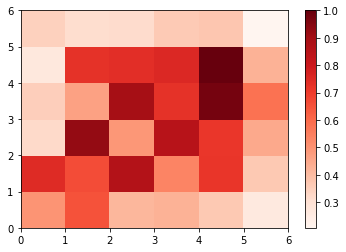

In [5]:
from minisom import MiniSom    
som_shape = (6, 6)
som = MiniSom(som_shape[0], som_shape[1], corpus_data.shape[1], sigma=0.3, learning_rate=0.9, random_seed=149)
som.train_random(corpus_data,num_iteration = 100, verbose = True)
plt.figure()
plt_plot = plt.pcolor(som.distance_map().T, cmap='Reds')
plt.colorbar()
plt.savefig('Som_heatmap.png')
plt.show()

Counter({(5, 5): 1783, (3, 1): 143, (3, 3): 127, (3, 0): 109, (4, 2): 107, (3, 2): 105, (0, 3): 103, (0, 0): 89, (5, 3): 86, (3, 5): 81, (4, 5): 80, (4, 1): 70, (1, 2): 69, (0, 2): 69, (2, 3): 61, (2, 2): 57, (1, 0): 55, (3, 4): 46, (2, 5): 43, (2, 1): 40, (0, 5): 35, (5, 0): 32, (1, 5): 32, (1, 4): 31, (5, 1): 25, (2, 0): 23, (5, 2): 23, (0, 4): 21, (1, 1): 20, (4, 4): 20, (1, 3): 13, (4, 0): 11, (0, 1): 10, (4, 3): 7, (5, 4): 7, (2, 4): 6})


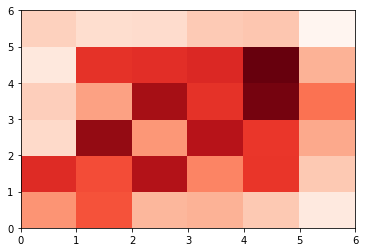

In [57]:
import seaborn as sns
import time
from collections import defaultdict

# sns_plot = sns.heatmap(som.distance_map().T, cmap='Reds') #熱像圖
# sns_plot.savefig("output.png")
winner_coordinates = np.array([som.winner(x) for x in corpus_data]).T
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)
winner_coordinates = winner_coordinates.T
winner_list = []
for i in winner_coordinates:
    i = i.tolist()
    winner_list.append(i)
count = Counter(tuple(item) for item in winner_list)
print(count)
# print(type(winner_coordinates))
# print(type(cluster_index))
cluster_index_list = cluster_index.tolist()
# print(len(cluster_index_list))

data_cluster_dict=defaultdict(list)
for i,d in enumerate(cluster_index_list):
    data_cluster_dict[d].append(df.index[i])
data_cluster_dict = dict(data_cluster_dict)
# print(type(data_cluster_dict))
with open('SOM_cluster.pickle', 'wb')as f:
    pk.dump(data_cluster_dict, f)
np.set_printoptions(threshold=np.inf)
# winner_coordinates
plt_plot = plt.pcolor(som.distance_map().T, cmap='Reds')

In [41]:
def sor_dic_key(diction):
    lista = []
    diction2 = {}
    for x in diction:
        lista.append([x, diction[x]])
    lista.sort(key=lambda x: x[0])
    for l in lista:
        diction2[l[0]] = l[1]
    return diction2
def sortedDictValues1(adict): 
    items = adict.items() 
    items.sorted() 
    return [value for key, value in items] 
def CountFrequency(arr): 
    return Counter(arr)

In [36]:
for k,v in sorted(data_cluster_dict.items()):
    print("第%2d群 ： %4d個文章"%(k,len(v)))

第 0群 ：   89個文章
第 1群 ：   10個文章
第 2群 ：   69個文章
第 3群 ：  103個文章
第 4群 ：   21個文章
第 5群 ：   35個文章
第 6群 ：   55個文章
第 7群 ：   20個文章
第 8群 ：   69個文章
第 9群 ：   13個文章
第10群 ：   31個文章
第11群 ：   32個文章
第12群 ：   23個文章
第13群 ：   40個文章
第14群 ：   57個文章
第15群 ：   61個文章
第16群 ：    6個文章
第17群 ：   43個文章
第18群 ：  109個文章
第19群 ：  143個文章
第20群 ：  105個文章
第21群 ：  127個文章
第22群 ：   46個文章
第23群 ：   81個文章
第24群 ：   11個文章
第25群 ：   70個文章
第26群 ：  107個文章
第27群 ：    7個文章
第28群 ：   20個文章
第29群 ：   80個文章
第30群 ：   32個文章
第31群 ：   25個文章
第32群 ：   23個文章
第33群 ：   86個文章
第34群 ：    7個文章
第35群 ： 1783個文章


11/26繼續

In [14]:
from wordcloud import WordCloud
df = pd.read_csv('matrix_DF.csv', index_col=0)
# df = df.T
# print(df)
# print(df['27876245'].values.tolist())
# print(df.iloc[0].name)
# for k,v in data_cluster_dict.items():
#     print(k)
#     print(v)
#     data = df[v].values.tolist()
#     for i,d in enumerate(data):
#         if d != 0:
#             print(df.iloc[i].name)
#             list35.append(str(df.iloc[i].name))
#     break
# print(data_cluster_dict[35])
list_all_data = []
for i in range(36):
    list_data = []
    data_pmid = data_cluster_dict[i]
    # print(len(data_pmid))
    for id in data_pmid:
        data = df[id].values.tolist()
        # print(len(data))
        for j,d in enumerate(data):
            if d != 0:
                # print(df.iloc[j].name)
                list_data.append(str(df.iloc[j].name))
    list_all_data.append(list_data)        
    # print(Counter(list_data))

    
# print(Counter(list35))

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

for i,d in enumerate(list_all_data):
    print("第%2d群有：%4d個關鍵字"%(i,len(d)))
    word_could_dict=Counter(d)
    wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig('SOM_cluster_'+ str(i) +'.png', bbox_inches='tight')
    plt.show()
    plt.close()

k-means

In [ ]:
corpus_data.shape

In [ ]:
n_clusters = 36
estimator=KMeans(n_clusters)
res=estimator.fit_predict(corpus_data)
lable_pred=estimator.labels_
centroids=estimator.cluster_centers_
inertia=estimator.inertia_
#print res
print(lable_pred)
# print(centroids)
# print(inertia)
unique, counts = np.unique(lable_pred, return_counts=True)
# dict(zip(unique, counts))
print(dict(zip(unique, counts)))

centers = centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);